In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error


from prophet import Prophet
from xgboost import XGBRegressor

In [ ]:
pip install darts

In [ ]:

pip install backtest

In [ ]:
pip install --upgrade transformers

In [2]:
df1=pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2014.csv')

In [3]:
df2 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2015.csv')

In [4]:
df3 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2016.csv')

In [5]:
df4 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2017.csv')

In [6]:
df5 =  pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2018.csv')

In [7]:
df6 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2019.csv')

In [8]:
df7 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2020.csv')

In [9]:
df8 =pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2021.csv')

In [10]:
df9 = pd.read_csv('C:/eaglei_outages/eaglei_outages/eaglei_outages_2022.csv')

In [11]:
miami_df1 = df1[(df1['fips_code'] == 12086) & (df1['county'] == 'Miami-Dade')]

In [12]:
miami_df1['run_start_time'] = pd.to_datetime(miami_df1['run_start_time'])

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\246605523.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df1['run_start_time'] = pd.to_datetime(miami_df1['run_start_time'])


In [13]:
# Convert run_start_time to datetime format
miami_df1['run_start_time'] = pd.to_datetime(miami_df1['run_start_time'])

# Set the run_start_time column as the DataFrame index
miami_df1.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\2306587600.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df1['run_start_time'] = pd.to_datetime(miami_df1['run_start_time'])


In [14]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df1 =miami_df1.resample('D')['sum'].max()

In [15]:
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df1 = daily_max_outages_miami_df1.to_frame().reset_index()

In [16]:
# Rename the columns for clarity
daily_max_outages_miami_df1.columns = ['Date', 'Highest_Outage']

In [17]:

print(daily_max_outages_miami_df1)

         Date  Highest_Outage
0  2014-11-01            1822
1  2014-11-02            4260
2  2014-11-03            2325
3  2014-11-04            5615
4  2014-11-05            2723
..        ...             ...
56 2014-12-27             332
57 2014-12-28            5451
58 2014-12-29            2279
59 2014-12-30             249
60 2014-12-31              57

[61 rows x 2 columns]


In [18]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df1 = miami_df1.resample('H')['sum'].max()

In [19]:
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df1 = hourly_max_outages_miami_df1.to_frame().reset_index()

In [20]:
# Rename the columns for clarity
hourly_max_outages_miami_df1.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df1)

                    Date  Highest_Outage
0    2014-11-01 04:00:00           216.0
1    2014-11-01 05:00:00           245.0
2    2014-11-01 06:00:00          1822.0
3    2014-11-01 07:00:00           253.0
4    2014-11-01 08:00:00           157.0
...                  ...             ...
1432 2014-12-30 20:00:00           110.0
1433 2014-12-30 21:00:00           118.0
1434 2014-12-30 22:00:00           104.0
1435 2014-12-30 23:00:00           101.0
1436 2014-12-31 00:00:00            57.0

[1437 rows x 2 columns]


In [21]:
hourly_max_outages_miami_df1 = hourly_max_outages_miami_df1.fillna(0)

In [22]:
hourly_max_outages_miami_df1

,Date,Highest_Outage
0,2014-11-01 04:00:00,216.0
1,2014-11-01 05:00:00,245.0
2,2014-11-01 06:00:00,1822.0
3,2014-11-01 07:00:00,253.0
4,2014-11-01 08:00:00,157.0
...,...,...
1432,2014-12-30 20:00:00,110.0
1433,2014-12-30 21:00:00,118.0
1434,2014-12-30 22:00:00,104.0
1435,2014-12-30 23:00:00,101.0


In [23]:
miami_df2 = df2[(df2['fips_code'] == 12086) & (df2['county'] == 'Miami-Dade')]




In [24]:
miami_df2['run_start_time'] = pd.to_datetime(miami_df2['run_start_time'])

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\3983012778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df2['run_start_time'] = pd.to_datetime(miami_df2['run_start_time'])


In [25]:

# Set the run_start_time column as the DataFrame index
miami_df2.set_index('run_start_time', inplace=True)

In [26]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df2 =miami_df2.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df2 = daily_max_outages_miami_df2.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df2.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df2)

          Date  Highest_Outage
0   2015-01-01            1613
1   2015-01-02             383
2   2015-01-03            2207
3   2015-01-04             856
4   2015-01-05            2559
..         ...             ...
360 2015-12-27             645
361 2015-12-28             106
362 2015-12-29             116
363 2015-12-30            1796
364 2015-12-31              45

[365 rows x 2 columns]


In [27]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df2 = miami_df2.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df2 = hourly_max_outages_miami_df2.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df2.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df2)
hourly_max_outages_miami_df2 = hourly_max_outages_miami_df2.fillna(0)
hourly_max_outages_miami_df2

                    Date  Highest_Outage
0    2015-01-01 00:00:00            43.0
1    2015-01-01 01:00:00            63.0
2    2015-01-01 02:00:00            75.0
3    2015-01-01 03:00:00            65.0
4    2015-01-01 04:00:00            30.0
...                  ...             ...
8732 2015-12-30 20:00:00            44.0
8733 2015-12-30 21:00:00            50.0
8734 2015-12-30 22:00:00            66.0
8735 2015-12-30 23:00:00            46.0
8736 2015-12-31 00:00:00            45.0

[8737 rows x 2 columns]


,Date,Highest_Outage
0,2015-01-01 00:00:00,43.0
1,2015-01-01 01:00:00,63.0
2,2015-01-01 02:00:00,75.0
3,2015-01-01 03:00:00,65.0
4,2015-01-01 04:00:00,30.0
...,...,...
8732,2015-12-30 20:00:00,44.0
8733,2015-12-30 21:00:00,50.0
8734,2015-12-30 22:00:00,66.0
8735,2015-12-30 23:00:00,46.0


In [28]:
miami_df3 = df3[(df3['fips_code'] == 12086) & (df3['county'] == 'Miami-Dade')]

In [29]:
miami_df3['run_start_time'] = pd.to_datetime(miami_df3['run_start_time'])

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\2987743143.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df3['run_start_time'] = pd.to_datetime(miami_df3['run_start_time'])


In [30]:

# Set the run_start_time column as the DataFrame index
miami_df3.set_index('run_start_time', inplace=True)

In [31]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df3 =miami_df3.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df3 = daily_max_outages_miami_df3.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df3.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df3)

          Date  Highest_Outage
0   2016-01-01             171
1   2016-01-02            1105
2   2016-01-03            6441
3   2016-01-04            5710
4   2016-01-05             743
..         ...             ...
361 2016-12-27             479
362 2016-12-28            1351
363 2016-12-29             349
364 2016-12-30            1660
365 2016-12-31             116

[366 rows x 2 columns]


In [32]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df3 = miami_df3.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df3 = hourly_max_outages_miami_df3.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df3.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df3)
hourly_max_outages_miami_df3 = hourly_max_outages_miami_df3.fillna(0)
hourly_max_outages_miami_df3

                    Date  Highest_Outage
0    2016-01-01 00:00:00           132.0
1    2016-01-01 01:00:00           171.0
2    2016-01-01 02:00:00           171.0
3    2016-01-01 03:00:00           139.0
4    2016-01-01 04:00:00            94.0
...                  ...             ...
8756 2016-12-30 20:00:00           155.0
8757 2016-12-30 21:00:00           107.0
8758 2016-12-30 22:00:00           137.0
8759 2016-12-30 23:00:00           183.0
8760 2016-12-31 00:00:00           116.0

[8761 rows x 2 columns]


,Date,Highest_Outage
0,2016-01-01 00:00:00,132.0
1,2016-01-01 01:00:00,171.0
2,2016-01-01 02:00:00,171.0
3,2016-01-01 03:00:00,139.0
4,2016-01-01 04:00:00,94.0
...,...,...
8756,2016-12-30 20:00:00,155.0
8757,2016-12-30 21:00:00,107.0
8758,2016-12-30 22:00:00,137.0
8759,2016-12-30 23:00:00,183.0


In [33]:
miami_df4 = df4[(df4['fips_code'] == 12086) & (df4['county'] == 'Miami-Dade')]

In [34]:
miami_df4['run_start_time'] = pd.to_datetime(miami_df4['run_start_time'])

# Set the run_start_time column as the DataFrame index
miami_df4.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\490334219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df4['run_start_time'] = pd.to_datetime(miami_df4['run_start_time'])


In [35]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df4 =miami_df4.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df4 = daily_max_outages_miami_df4.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df4.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df4)

          Date  Highest_Outage
0   2017-01-01           545.0
1   2017-01-02          2671.0
2   2017-01-03          1883.0
3   2017-01-04          3732.0
4   2017-01-05           298.0
..         ...             ...
360 2017-12-27           275.0
361 2017-12-28          2822.0
362 2017-12-29           203.0
363 2017-12-30           110.0
364 2017-12-31            13.0

[365 rows x 2 columns]


In [36]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df4 = miami_df4.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df4 = hourly_max_outages_miami_df4.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df4.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df4)
hourly_max_outages_miami_df4 = hourly_max_outages_miami_df4.fillna(0)
hourly_max_outages_miami_df4

                    Date  Highest_Outage
0    2017-01-01 00:00:00           545.0
1    2017-01-01 01:00:00            79.0
2    2017-01-01 02:00:00            79.0
3    2017-01-01 03:00:00            22.0
4    2017-01-01 04:00:00           186.0
...                  ...             ...
8732 2017-12-30 20:00:00            46.0
8733 2017-12-30 21:00:00            46.0
8734 2017-12-30 22:00:00             7.0
8735 2017-12-30 23:00:00             7.0
8736 2017-12-31 00:00:00            13.0

[8737 rows x 2 columns]


,Date,Highest_Outage
0,2017-01-01 00:00:00,545.0
1,2017-01-01 01:00:00,79.0
2,2017-01-01 02:00:00,79.0
3,2017-01-01 03:00:00,22.0
4,2017-01-01 04:00:00,186.0
...,...,...
8732,2017-12-30 20:00:00,46.0
8733,2017-12-30 21:00:00,46.0
8734,2017-12-30 22:00:00,7.0
8735,2017-12-30 23:00:00,7.0


In [37]:
miami_df5 = df5[(df5['fips_code'] == 12086) & (df5['county'] == 'Miami-Dade')]

In [38]:
miami_df5['run_start_time'] = pd.to_datetime(miami_df5['run_start_time'])

# Set the run_start_time column as the DataFrame index
miami_df5.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\126897581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df5['run_start_time'] = pd.to_datetime(miami_df5['run_start_time'])


In [39]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df5 =miami_df5.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df5 = daily_max_outages_miami_df5.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df5.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df5)

          Date  Highest_Outage
0   2018-01-01          2408.0
1   2018-01-02          3129.0
2   2018-01-03          9059.0
3   2018-01-04          1485.0
4   2018-01-05           399.0
..         ...             ...
360 2018-12-27          3496.0
361 2018-12-28          1890.0
362 2018-12-29           285.0
363 2018-12-30          1347.0
364 2018-12-31            60.0

[365 rows x 2 columns]


In [40]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df5 = miami_df5.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df5 = hourly_max_outages_miami_df5.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df5.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df5)
hourly_max_outages_miami_df5 = hourly_max_outages_miami_df5.fillna(0)
hourly_max_outages_miami_df5

                    Date  Highest_Outage
0    2018-01-01 00:00:00          2043.0
1    2018-01-01 01:00:00            54.0
2    2018-01-01 02:00:00            32.0
3    2018-01-01 03:00:00          2076.0
4    2018-01-01 04:00:00          1054.0
...                  ...             ...
8732 2018-12-30 20:00:00           563.0
8733 2018-12-30 21:00:00           441.0
8734 2018-12-30 22:00:00           129.0
8735 2018-12-30 23:00:00           346.0
8736 2018-12-31 00:00:00            60.0

[8737 rows x 2 columns]


,Date,Highest_Outage
0,2018-01-01 00:00:00,2043.0
1,2018-01-01 01:00:00,54.0
2,2018-01-01 02:00:00,32.0
3,2018-01-01 03:00:00,2076.0
4,2018-01-01 04:00:00,1054.0
...,...,...
8732,2018-12-30 20:00:00,563.0
8733,2018-12-30 21:00:00,441.0
8734,2018-12-30 22:00:00,129.0
8735,2018-12-30 23:00:00,346.0


In [41]:
miami_df6 = df6[(df6['fips_code'] == 12086) & (df6['county'] == 'Miami-Dade')]

In [42]:
miami_df6['run_start_time'] = pd.to_datetime(miami_df6['run_start_time'])

# Set the run_start_time column as the DataFrame index
miami_df6.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\1541949127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df6['run_start_time'] = pd.to_datetime(miami_df6['run_start_time'])


In [43]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df6 =miami_df6.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df6 = daily_max_outages_miami_df6.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df6.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df6)

          Date  Highest_Outage
0   2019-01-01           248.0
1   2019-01-02          2064.0
2   2019-01-03           813.0
3   2019-01-04          2564.0
4   2019-01-05          2721.0
..         ...             ...
360 2019-12-27           356.0
361 2019-12-28           320.0
362 2019-12-29          2880.0
363 2019-12-30           122.0
364 2019-12-31            61.0

[365 rows x 2 columns]


In [44]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df6 = miami_df6.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df6 = hourly_max_outages_miami_df6.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df6.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df6)
hourly_max_outages_miami_df6 = hourly_max_outages_miami_df6.fillna(0)
hourly_max_outages_miami_df6

                    Date  Highest_Outage
0    2019-01-01 00:00:00            75.0
1    2019-01-01 01:00:00           248.0
2    2019-01-01 02:00:00           247.0
3    2019-01-01 03:00:00           248.0
4    2019-01-01 04:00:00           145.0
...                  ...             ...
8732 2019-12-30 20:00:00            51.0
8733 2019-12-30 21:00:00            48.0
8734 2019-12-30 22:00:00            29.0
8735 2019-12-30 23:00:00            26.0
8736 2019-12-31 00:00:00            61.0

[8737 rows x 2 columns]


,Date,Highest_Outage
0,2019-01-01 00:00:00,75.0
1,2019-01-01 01:00:00,248.0
2,2019-01-01 02:00:00,247.0
3,2019-01-01 03:00:00,248.0
4,2019-01-01 04:00:00,145.0
...,...,...
8732,2019-12-30 20:00:00,51.0
8733,2019-12-30 21:00:00,48.0
8734,2019-12-30 22:00:00,29.0
8735,2019-12-30 23:00:00,26.0


In [45]:
miami_df7 = df7[(df7['fips_code'] == 12086) & (df7['county'] == 'Miami-Dade')]

In [46]:
miami_df7['run_start_time'] = pd.to_datetime(miami_df7['run_start_time'])

# Set the run_start_time column as the DataFrame index
miami_df7.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\1917895754.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df7['run_start_time'] = pd.to_datetime(miami_df7['run_start_time'])


In [47]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df7 =miami_df7.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df7 = daily_max_outages_miami_df7.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df7.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df7)

          Date  Highest_Outage
0   2020-01-01           340.0
1   2020-01-02           478.0
2   2020-01-03          2181.0
3   2020-01-04          2317.0
4   2020-01-05          1949.0
..         ...             ...
361 2020-12-27          3113.0
362 2020-12-28          1659.0
363 2020-12-29           161.0
364 2020-12-30          2375.0
365 2020-12-31            25.0

[366 rows x 2 columns]


In [48]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df7 = miami_df7.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df7 = hourly_max_outages_miami_df7.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df7.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df7)
hourly_max_outages_miami_df7 = hourly_max_outages_miami_df7.fillna(0)
hourly_max_outages_miami_df7

                    Date  Highest_Outage
0    2020-01-01 00:00:00           124.0
1    2020-01-01 01:00:00            91.0
2    2020-01-01 02:00:00            92.0
3    2020-01-01 03:00:00            30.0
4    2020-01-01 04:00:00           301.0
...                  ...             ...
8756 2020-12-30 20:00:00            63.0
8757 2020-12-30 21:00:00            63.0
8758 2020-12-30 22:00:00            86.0
8759 2020-12-30 23:00:00            86.0
8760 2020-12-31 00:00:00            25.0

[8761 rows x 2 columns]


,Date,Highest_Outage
0,2020-01-01 00:00:00,124.0
1,2020-01-01 01:00:00,91.0
2,2020-01-01 02:00:00,92.0
3,2020-01-01 03:00:00,30.0
4,2020-01-01 04:00:00,301.0
...,...,...
8756,2020-12-30 20:00:00,63.0
8757,2020-12-30 21:00:00,63.0
8758,2020-12-30 22:00:00,86.0
8759,2020-12-30 23:00:00,86.0


In [49]:
miami_df8 = df8[(df8['fips_code'] == 12086) & (df8['county'] == 'Miami-Dade')]

In [50]:
miami_df8['run_start_time'] = pd.to_datetime(miami_df8['run_start_time'])

# Set the run_start_time column as the DataFrame index
miami_df8.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\3893904548.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df8['run_start_time'] = pd.to_datetime(miami_df8['run_start_time'])


In [51]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df8 =miami_df8.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df8 = daily_max_outages_miami_df8.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df8.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df8)

          Date  Highest_Outage
0   2021-01-01           712.0
1   2021-01-02          2373.0
2   2021-01-03           563.0
3   2021-01-04          1653.0
4   2021-01-05          2212.0
..         ...             ...
360 2021-12-27           121.0
361 2021-12-28           472.0
362 2021-12-29           699.0
363 2021-12-30           313.0
364 2021-12-31           197.0

[365 rows x 2 columns]


In [52]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df8 = miami_df8.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df8 = hourly_max_outages_miami_df8.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df8.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df8)
hourly_max_outages_miami_df8 = hourly_max_outages_miami_df8.fillna(0)
hourly_max_outages_miami_df8

                    Date  Highest_Outage
0    2021-01-01 00:00:00            91.0
1    2021-01-01 01:00:00            68.0
2    2021-01-01 02:00:00            67.0
3    2021-01-01 03:00:00            27.0
4    2021-01-01 04:00:00            23.0
...                  ...             ...
8732 2021-12-30 20:00:00           257.0
8733 2021-12-30 21:00:00           231.0
8734 2021-12-30 22:00:00           218.0
8735 2021-12-30 23:00:00           216.0
8736 2021-12-31 00:00:00           197.0

[8737 rows x 2 columns]


,Date,Highest_Outage
0,2021-01-01 00:00:00,91.0
1,2021-01-01 01:00:00,68.0
2,2021-01-01 02:00:00,67.0
3,2021-01-01 03:00:00,27.0
4,2021-01-01 04:00:00,23.0
...,...,...
8732,2021-12-30 20:00:00,257.0
8733,2021-12-30 21:00:00,231.0
8734,2021-12-30 22:00:00,218.0
8735,2021-12-30 23:00:00,216.0


In [53]:
miami_df9 = df9[(df9['fips_code'] == 12086) & (df9['county'] == 'Miami-Dade')]

In [54]:
miami_df9['run_start_time'] = pd.to_datetime(miami_df9['run_start_time'])

# Set the run_start_time column as the DataFrame index
miami_df9.set_index('run_start_time', inplace=True)

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\3374781361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  miami_df9['run_start_time'] = pd.to_datetime(miami_df9['run_start_time'])


In [55]:
# Resample the data to daily frequency and take the highest outage number for each day
daily_max_outages_miami_df9 =miami_df9.resample('D')['sum'].max()
# Create a new DataFrame from the resampled data
daily_max_outages_miami_df9 = daily_max_outages_miami_df9.to_frame().reset_index()
# Rename the columns for clarity
daily_max_outages_miami_df9.columns = ['Date', 'Highest_Outage']

print(daily_max_outages_miami_df9)

          Date  Highest_Outage
0   2022-01-01          1456.0
1   2022-01-02          2715.0
2   2022-01-03          1606.0
3   2022-01-04          3313.0
4   2022-01-05           404.0
..         ...             ...
311 2022-11-08          2423.0
312 2022-11-09          3465.0
313 2022-11-10          3458.0
314 2022-11-11            20.0
315 2022-11-12             NaN

[316 rows x 2 columns]


In [56]:
# Resample the data to hourly frequency and take the highest outage number for each hour
hourly_max_outages_miami_df9 = miami_df9.resample('H')['sum'].max()
# Create a new DataFrame from the resampled data
hourly_max_outages_miami_df9 = hourly_max_outages_miami_df9.to_frame().reset_index()
# Rename the columns for clarity
hourly_max_outages_miami_df9.columns = ['Date', 'Highest_Outage']

print(hourly_max_outages_miami_df9)
hourly_max_outages_miami_df9 = hourly_max_outages_miami_df9.fillna(0)
hourly_max_outages_miami_df9

                    Date  Highest_Outage
0    2022-01-01 00:00:00           167.0
1    2022-01-01 01:00:00           119.0
2    2022-01-01 02:00:00           103.0
3    2022-01-01 03:00:00           208.0
4    2022-01-01 04:00:00           191.0
...                  ...             ...
7561 2022-11-12 01:00:00             NaN
7562 2022-11-12 02:00:00             NaN
7563 2022-11-12 03:00:00             NaN
7564 2022-11-12 04:00:00             NaN
7565 2022-11-12 05:00:00             NaN

[7566 rows x 2 columns]


,Date,Highest_Outage
0,2022-01-01 00:00:00,167.0
1,2022-01-01 01:00:00,119.0
2,2022-01-01 02:00:00,103.0
3,2022-01-01 03:00:00,208.0
4,2022-01-01 04:00:00,191.0
...,...,...
7561,2022-11-12 01:00:00,0.0
7562,2022-11-12 02:00:00,0.0
7563,2022-11-12 03:00:00,0.0
7564,2022-11-12 04:00:00,0.0


In [57]:
df_final = pd.concat([hourly_max_outages_miami_df1,hourly_max_outages_miami_df2,hourly_max_outages_miami_df3,hourly_max_outages_miami_df4,hourly_max_outages_miami_df5,hourly_max_outages_miami_df6,hourly_max_outages_miami_df7,hourly_max_outages_miami_df8,hourly_max_outages_miami_df9])

In [ ]:
average_outages_miami = df_final['Highest_Outage'].mean()


In [58]:
df_final

,Date,Highest_Outage
0,2014-11-01 04:00:00,216.0
1,2014-11-01 05:00:00,245.0
2,2014-11-01 06:00:00,1822.0
3,2014-11-01 07:00:00,253.0
4,2014-11-01 08:00:00,157.0
...,...,...
7561,2022-11-12 01:00:00,0.0
7562,2022-11-12 02:00:00,0.0
7563,2022-11-12 03:00:00,0.0
7564,2022-11-12 04:00:00,0.0


In [59]:
# Convert run_start_time to datetime format
df_final['Date'] = pd.to_datetime(df_final['Date'])

# Set the run_start_time column as the DataFrame index
df_final.set_index('Date', inplace=True)

In [60]:
df_final

,Highest_Outage
Date,
2014-11-01 04:00:00,216.0
2014-11-01 05:00:00,245.0
2014-11-01 06:00:00,1822.0
2014-11-01 07:00:00,253.0
2014-11-01 08:00:00,157.0
...,...
2022-11-12 01:00:00,0.0
2022-11-12 02:00:00,0.0
2022-11-12 03:00:00,0.0


In [61]:
df = df_final.sort_index()

In [62]:
df

,Highest_Outage
Date,
2014-11-01 04:00:00,216.0
2014-11-01 05:00:00,245.0
2014-11-01 06:00:00,1822.0
2014-11-01 07:00:00,253.0
2014-11-01 08:00:00,157.0
...,...
2022-11-12 01:00:00,0.0
2022-11-12 02:00:00,0.0
2022-11-12 03:00:00,0.0


In [63]:
df=df.reset_index()

In [64]:
# Convert the "run_start_time" column to a datetime type
df['Date'] = pd.to_datetime(df['Date'])

# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['Date'].dt.date

In [65]:
df

,Date,Highest_Outage,date
0,2014-11-01 04:00:00,216.0,2014-11-01
1,2014-11-01 05:00:00,245.0,2014-11-01
2,2014-11-01 06:00:00,1822.0,2014-11-01
3,2014-11-01 07:00:00,253.0,2014-11-01
4,2014-11-01 08:00:00,157.0,2014-11-01
...,...,...,...
70205,2022-11-12 01:00:00,0.0,2022-11-12
70206,2022-11-12 02:00:00,0.0,2022-11-12
70207,2022-11-12 03:00:00,0.0,2022-11-12
70208,2022-11-12 04:00:00,0.0,2022-11-12


In [66]:
# Create a new column 'date' containing only the date part of 'run_start_time'
df['date'] = df['Date'].dt.date

In [67]:
df

,Date,Highest_Outage,date
0,2014-11-01 04:00:00,216.0,2014-11-01
1,2014-11-01 05:00:00,245.0,2014-11-01
2,2014-11-01 06:00:00,1822.0,2014-11-01
3,2014-11-01 07:00:00,253.0,2014-11-01
4,2014-11-01 08:00:00,157.0,2014-11-01
...,...,...,...
70205,2022-11-12 01:00:00,0.0,2022-11-12
70206,2022-11-12 02:00:00,0.0,2022-11-12
70207,2022-11-12 03:00:00,0.0,2022-11-12
70208,2022-11-12 04:00:00,0.0,2022-11-12


In [68]:
# Group by 'date' and find the maximum 'Highest_Outage' for each day
day_max_outages =df.groupby('date')['Highest_Outage'].max()

# Create a new DataFrame from the grouped data
day_max_outages_df = day_max_outages.reset_index()

print(day_max_outages_df)

            date  Highest_Outage
0     2014-11-01          1822.0
1     2014-11-02          4260.0
2     2014-11-03          2325.0
3     2014-11-04          5615.0
4     2014-11-05          2723.0
...          ...             ...
2929  2022-11-08          2423.0
2930  2022-11-09          3465.0
2931  2022-11-10          3458.0
2932  2022-11-11            20.0
2933  2022-11-12             0.0

[2934 rows x 2 columns]


In [69]:
# Group the 'hourly_sum' data by date and sum the values for each date
df_grouped = day_max_outages_df

In [70]:
df_grouped

,date,Highest_Outage
0,2014-11-01,1822.0
1,2014-11-02,4260.0
2,2014-11-03,2325.0
3,2014-11-04,5615.0
4,2014-11-05,2723.0
...,...,...
2929,2022-11-08,2423.0
2930,2022-11-09,3465.0
2931,2022-11-10,3458.0
2932,2022-11-11,20.0


In [71]:
# Convert run_start_time to datetime format
df_grouped['date'] = pd.to_datetime(df_grouped['date'])

# Set the run_start_time column as the DataFrame index
df_grouped.set_index('date', inplace=True)

In [72]:
df_grouped

,Highest_Outage
date,
2014-11-01,1822.0
2014-11-02,4260.0
2014-11-03,2325.0
2014-11-04,5615.0
2014-11-05,2723.0
...,...
2022-11-08,2423.0
2022-11-09,3465.0
2022-11-10,3458.0


In [73]:
df1=df_grouped

In [74]:
series=df1.squeeze()

In [75]:
df1=df1.reset_index()

In [76]:
print(series)

date
2014-11-01    1822.0
2014-11-02    4260.0
2014-11-03    2325.0
2014-11-04    5615.0
2014-11-05    2723.0
               ...  
2022-11-08    2423.0
2022-11-09    3465.0
2022-11-10    3458.0
2022-11-11      20.0
2022-11-12       0.0
Name: Highest_Outage, Length: 2934, dtype: float64


In [77]:
df1

,date,Highest_Outage
0,2014-11-01,1822.0
1,2014-11-02,4260.0
2,2014-11-03,2325.0
3,2014-11-04,5615.0
4,2014-11-05,2723.0
...,...,...
2929,2022-11-08,2423.0
2930,2022-11-09,3465.0
2931,2022-11-10,3458.0
2932,2022-11-11,20.0


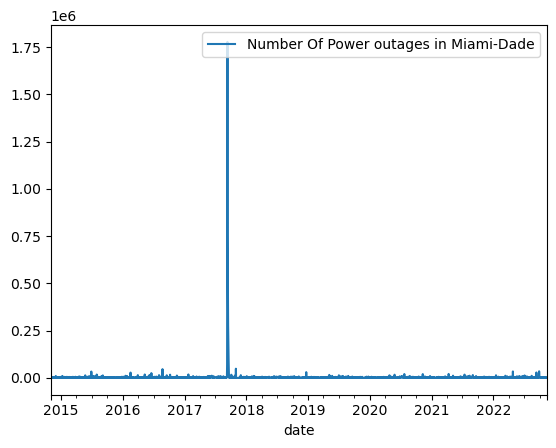

In [78]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline
series.plot(label="Number Of Power outages in Miami-Dade")
plt.legend();

In [79]:
from darts.dataprocessing.transformers import Scaler

In [80]:
df=df.reset_index()

In [81]:
scalerp=Scaler()

In [82]:
import pandas as pd
from darts import TimeSeries
from darts.dataprocessing.transformers import Scaler

In [83]:

# Convert the 'date' column to datetime
df1['date'] = pd.to_datetime(df1['date'])

# Set 'date' as the index
df1.set_index('date', inplace=True)

# Ensure 'Highest_Outage' contains only numeric values and replace NaN with 0
df1['Highest_Outage'] = pd.to_numeric(df1['Highest_Outage'], errors='coerce').fillna(0)

# Create a TimeSeries object from the 'Highest_Outage' column, inferring the frequency
series = TimeSeries.from_dataframe(df1, fill_missing_dates=True, freq='D')

print(series)

<TimeSeries (DataArray) (date: 2934, component: 1, sample: 1)>
array([[[1822.]],

       [[4260.]],

       [[2325.]],

       ...,

       [[3458.]],

       [[  20.]],

       [[   0.]]])
Coordinates:
  * date       (date) datetime64[ns] 2014-11-01 2014-11-02 ... 2022-11-12
  * component  (component) object 'Highest_Outage'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None


In [84]:
series_scaled = scalerp.fit_transform(series)

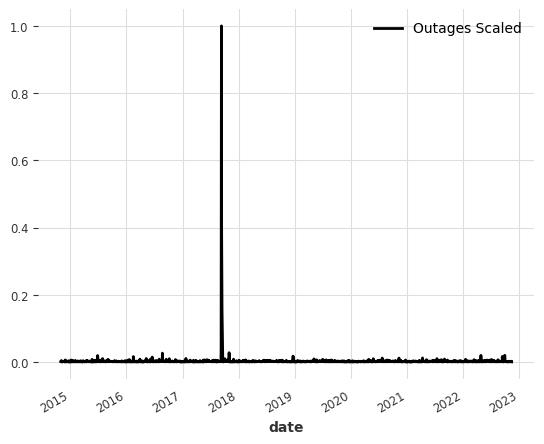

In [85]:
# plottingair_ds.plot(label="Number Of Passengers")
series_scaled.plot(label = "Outages Scaled")

plt.legend();

In [86]:
df=df.drop(['Date'],axis=1)

In [87]:
df

,index,Highest_Outage,date
0,0,216.0,2014-11-01
1,1,245.0,2014-11-01
2,2,1822.0,2014-11-01
3,3,253.0,2014-11-01
4,4,157.0,2014-11-01
...,...,...,...
70205,70205,0.0,2022-11-12
70206,70206,0.0,2022-11-12
70207,70207,0.0,2022-11-12
70208,70208,0.0,2022-11-12


In [88]:
series_train,  series_val = series_scaled[:-36],series_scaled[-36:]

In [89]:
type(series_train)

darts.timeseries.TimeSeries

In [90]:
from darts.models import NBEATSModel
print('model_loaded')

model_loaded


In [203]:
from darts.metrics import mape

In [204]:
# creating a model object
model = NBEATSModel(input_chunk_length=24 , output_chunk_length=12, n_epochs = 100 , random_state = 15)

In [205]:
df

,date,Highest_Outage,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear
0,2014-11-01,216.0,0,5,4,11,2014,305,1,44
1,2014-11-01,245.0,0,5,4,11,2014,305,1,44
2,2014-11-01,1822.0,0,5,4,11,2014,305,1,44
3,2014-11-01,253.0,0,5,4,11,2014,305,1,44
4,2014-11-01,157.0,0,5,4,11,2014,305,1,44
...,...,...,...,...,...,...,...,...,...,...
70178,2022-11-10,20.0,0,3,4,11,2022,314,10,45
70179,2022-11-10,20.0,0,3,4,11,2022,314,10,45
70180,2022-11-11,20.0,0,4,4,11,2022,315,11,45
70181,2022-11-11,20.0,0,4,4,11,2022,315,11,45


In [207]:
# fitting the model
model.fit([series_train], verbose = True)

In [94]:
import darts

In [95]:
df=df.reset_index()

In [96]:
df

,level_0,index,Highest_Outage,date
0,0,0,216.0,2014-11-01
1,1,1,245.0,2014-11-01
2,2,2,1822.0,2014-11-01
3,3,3,253.0,2014-11-01
4,4,4,157.0,2014-11-01
...,...,...,...,...
70205,70205,70205,0.0,2022-11-12
70206,70206,70206,0.0,2022-11-12
70207,70207,70207,0.0,2022-11-12
70208,70208,70208,0.0,2022-11-12


In [97]:
print(ii)

NameError: name 'ii' is not defined

In [98]:
df.drop(['level_0','index'], axis=1)

,Highest_Outage,date
0,216.0,2014-11-01
1,245.0,2014-11-01
2,1822.0,2014-11-01
3,253.0,2014-11-01
4,157.0,2014-11-01
...,...,...
70205,0.0,2022-11-12
70206,0.0,2022-11-12
70207,0.0,2022-11-12
70208,0.0,2022-11-12


In [99]:
# Convert run_start_time to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set the run_start_time column as the DataFrame index
df.set_index('date', inplace=True)

In [100]:
df

,level_0,index,Highest_Outage
date,,,
2014-11-01,0,0,216.0
2014-11-01,1,1,245.0
2014-11-01,2,2,1822.0
2014-11-01,3,3,253.0
2014-11-01,4,4,157.0
...,...,...,...
2022-11-12,70205,70205,0.0
2022-11-12,70206,70206,0.0
2022-11-12,70207,70207,0.0


In [101]:
df.drop(['level_0','index'], axis=1)

,Highest_Outage
date,
2014-11-01,216.0
2014-11-01,245.0
2014-11-01,1822.0
2014-11-01,253.0
2014-11-01,157.0
...,...
2022-11-12,0.0
2022-11-12,0.0
2022-11-12,0.0


In [102]:
df_grouped

,Highest_Outage
date,
2014-11-01,1822.0
2014-11-02,4260.0
2014-11-03,2325.0
2014-11-04,5615.0
2014-11-05,2723.0
...,...
2022-11-08,2423.0
2022-11-09,3465.0
2022-11-10,3458.0


In [103]:
dfn=df_grouped

In [104]:
series=df.squeeze()

<Axes: xlabel='date'>

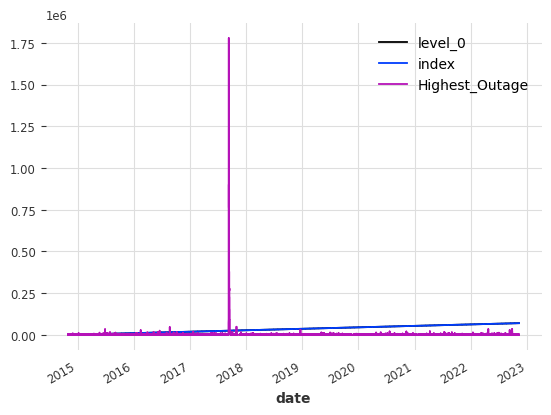

In [105]:
series.plot(label="Number Of hourly ")

In [106]:
from darts.models import AutoARIMA

In [107]:
from darts.models import FFT

In [108]:
# facebook prophet model
from darts.models import Prophet

In [109]:
from darts.backtesting import backtest_forecasting

ModuleNotFoundError: No module named 'darts.backtesting'

In [110]:
from darts.metrics import mape

In [111]:
from darts import TimeSeries
from darts.models import Prophet, ExponentialSmoothing, AutoARIMA, Theta, RegressionEnsembleModel, RegressionModel

In [112]:
from darts.metrics import rmse 

def eval_model(model, flow,
               past_covariates=None,  future_covariates=None,
              retrain = False,
              forecast_horizon = 10,
              last_obs = 200):
    # Past and future covariates are optional because they won't always be used in our tests
    
    # We backtest the model on the last 20% of the flow series, 
    # with a horizon of `forecast_horizon` steps:
    backtest = model.historical_forecasts(series=flow, 
                                          past_covariates=past_covariates,
                                          future_covariates=future_covariates,
                                          start=0.8, 
                                          retrain=retrain,
                                          verbose=True, 
                                          forecast_horizon=forecast_horizon)
    
    flow[-len(backtest) - last_obs:].plot()
    backtest.plot(label='backtest (n=' + str(forecast_horizon) + ')')
    
    print('Backtest RMSE = {}'.format(np.round( rmse(flow, backtest) )))

In [113]:
print(series)

            level_0  index  Highest_Outage
date                                      
2014-11-01        0      0           216.0
2014-11-01        1      1           245.0
2014-11-01        2      2          1822.0
2014-11-01        3      3           253.0
2014-11-01        4      4           157.0
...             ...    ...             ...
2022-11-12    70205  70205             0.0
2022-11-12    70206  70206             0.0
2022-11-12    70207  70207             0.0
2022-11-12    70208  70208             0.0
2022-11-12    70209  70209             0.0

[70210 rows x 3 columns]


In [114]:
df = df.loc[df.Date > CFG.cutoff]
series = TimeSeries.from_dataframe(df, 'Date', 'hourly_sum', freq = 'D')
series.plot()
# df.set_index('Date').VWAP.plot()

AttributeError: 'DataFrame' object has no attribute 'Date'

In [115]:
df

,level_0,index,Highest_Outage
date,,,
2014-11-01,0,0,216.0
2014-11-01,1,1,245.0
2014-11-01,2,2,1822.0
2014-11-01,3,3,253.0
2014-11-01,4,4,157.0
...,...,...,...
2022-11-12,70205,70205,0.0
2022-11-12,70206,70206,0.0
2022-11-12,70207,70207,0.0


In [116]:
df=df.drop(['level_0','index'], axis=1)

In [117]:
df

,Highest_Outage
date,
2014-11-01,216.0
2014-11-01,245.0
2014-11-01,1822.0
2014-11-01,253.0
2014-11-01,157.0
...,...
2022-11-12,0.0
2022-11-12,0.0
2022-11-12,0.0


In [118]:
df=df.reset_index()

In [119]:
# Assuming CFG.cutoff is the desired cutoff date
df = df.loc[df['date'] > CFG.cutoff]

# Create the TimeSeries object from the DataFrame
series = TimeSeries.from_dataframe(df, 'date', 'hourly_sum', freq='D')

# Plot the TimeSeries data
series.plot()

NameError: name 'CFG' is not defined

In [120]:
# ExponentialSmoothing can't handle NAs :-(
from darts.utils.missing_values import fill_missing_values
series = fill_missing_values(series)

# split into training / validation
train, val = series[:-60], series[-60:]

AttributeError: 'DataFrame' object has no attribute 'pd_dataframe'

In [121]:
dfn

,Highest_Outage
date,
2014-11-01,1822.0
2014-11-02,4260.0
2014-11-03,2325.0
2014-11-04,5615.0
2014-11-05,2723.0
...,...
2022-11-08,2423.0
2022-11-09,3465.0
2022-11-10,3458.0


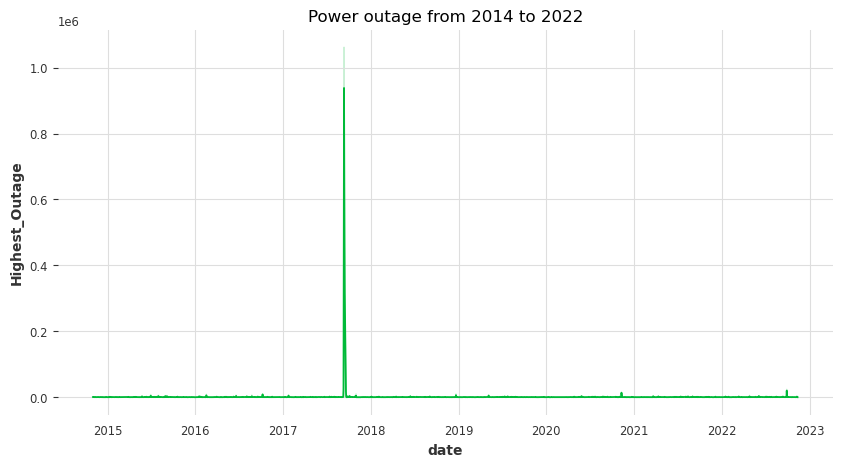

In [122]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.date, y = df["Highest_Outage"], color = "#00BA38")
ax.title.set_text('Power outage from 2014 to 2022')

In [123]:
def create_features(df, label=None):
    """
    Creates time series features from datetime index.
    """
    df['date'] = df.Datetime
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['date','hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = df[label]
        return X, y
    return X

In [124]:
# See our features and target
X, y = create_features(df, label='Highest_Outage')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

AttributeError: 'DataFrame' object has no attribute 'Datetime'

In [125]:
df

,date,Highest_Outage
0,2014-11-01,216.0
1,2014-11-01,245.0
2,2014-11-01,1822.0
3,2014-11-01,253.0
4,2014-11-01,157.0
...,...,...
70205,2022-11-12,0.0
70206,2022-11-12,0.0
70207,2022-11-12,0.0
70208,2022-11-12,0.0


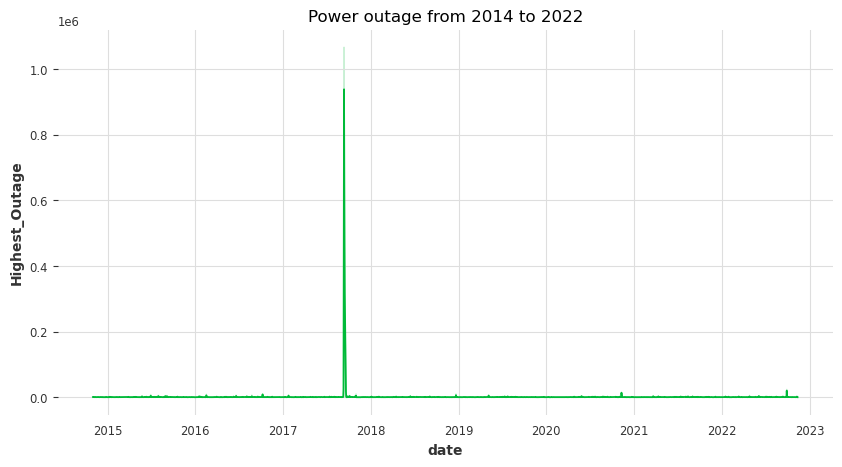

In [126]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
sns.lineplot(x=df.date, y = df["Highest_Outage"], color = "#00BA38")
ax.title.set_text('Power outage from 2014 to 2022')

In [127]:
def create_features(df1, label=None):
    """
    Creates time series features from datetime index.
    """
    df1['date'] = df1.date
    df1['hour'] = df1['date'].dt.hour
    df1['dayofweek'] = df1['date'].dt.dayofweek
    df1['quarter'] = df1['date'].dt.quarter
    df1['month'] = df1['date'].dt.month
    df1['year'] = df1['date'].dt.year
    df1['dayofyear'] = df1['date'].dt.dayofyear
    df1['dayofmonth'] = df1['date'].dt.day
    df1['weekofyear'] = df1['date'].dt.weekofyear
    
    X = df1[['date','hour','dayofweek','quarter','month','year','dayofyear','dayofmonth','weekofyear']]
    
    if label:
        y = df1[label]
        return X, y
    return X

In [128]:
# See our features and target
X, y = create_features(df, label='Highest_Outage')
features_and_target = pd.concat([X, y], axis=1)
features_and_target.head()

C:\Users\halee\AppData\Local\Temp\ipykernel_12552\2299411150.py:13: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df1['weekofyear'] = df1['date'].dt.weekofyear


,date,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,Highest_Outage
0,2014-11-01,0,5,4,11,2014,305,1,44,216.0
1,2014-11-01,0,5,4,11,2014,305,1,44,245.0
2,2014-11-01,0,5,4,11,2014,305,1,44,1822.0
3,2014-11-01,0,5,4,11,2014,305,1,44,253.0
4,2014-11-01,0,5,4,11,2014,305,1,44,157.0


In [129]:
# Setup and train model and fit

import prophet
model = Prophet()
model.fit(df_train_prophet)

NameError: name 'df_train_prophet' is not defined

In [130]:
# we reduce the dataset size for speed - the only requirement while doing is to keep at least two complete cycles 
# for each seasonality we intend to fit 
m = Prophet().fit(xdat.iloc[:30000])
future = m.make_future_dataframe(periods = 24, freq = 'H')
forecast = m.predict(future)
m.plot_components(forecast, figsize=(CFG.img_dim1, CFG.img_dim2))
print()

NameError: name 'xdat' is not defined

In [131]:
df.plot(style='.',
        figsize=(15, 5),
        color=color_pal[0],
        title='outage ')
plt.show()

NameError: name 'color_pal' is not defined

In [132]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

<Axes: ylabel='Frequency'>

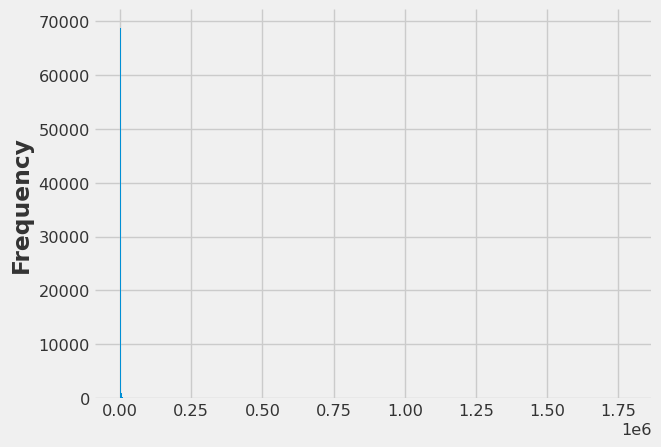

In [133]:
df['Highest_Outage'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}>

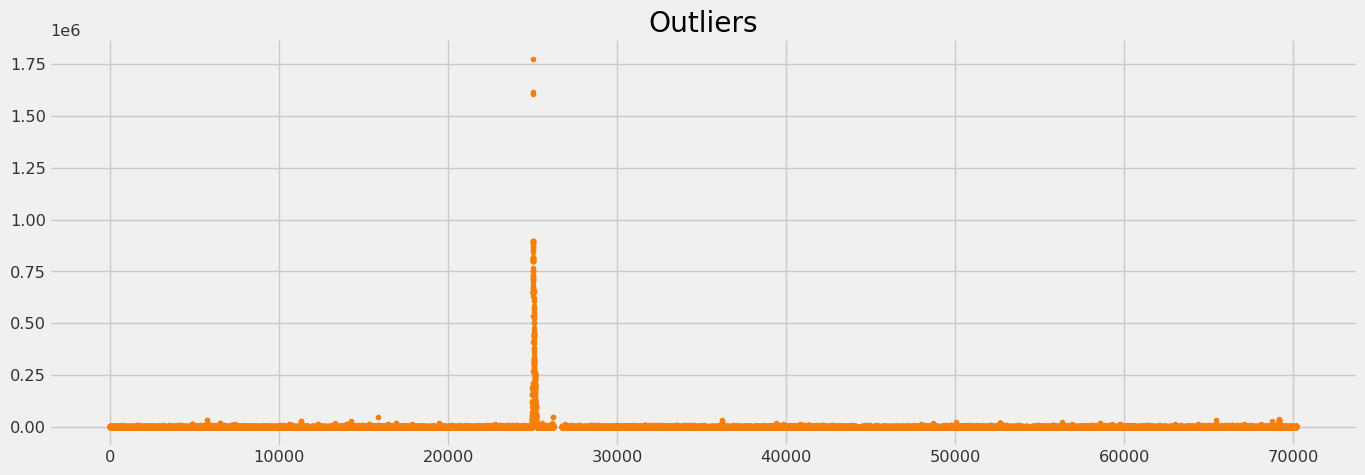

In [134]:
df.query('Highest_Outage > 0')['Highest_Outage'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [135]:
df = df.query('Highest_Outage > 0').copy()

In [136]:
train = df.loc[df.index < '01-01-2020']
test = df.loc[df.index >= '01-01-2020']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2020', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [137]:
train = df.loc[df.index < '01-01-2020']
test = df.loc[df.index >= '01-01-2020']
# Plot the train and test sets
fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test.plot(ax=ax, label='Test Set')
ax.axvline('2020-01-01', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

TypeError: Invalid comparison between dtype=int64 and str

In [138]:
import pandas as pd
from darts import TimeSeries

In [139]:
# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df1, "date", "Highest_Outage")

AttributeError: time_col='date' is not present.


AttributeError: time_col='date' is not present.

In [140]:
  df1['month'] = df1['date'].dt.month

KeyError: 'date'

In [142]:
df1['Date'] = pd.to_datetime(df1['Date'])

KeyError: 'Date'

In [143]:
df1

,Highest_Outage
date,
2014-11-01,1822.0
2014-11-02,4260.0
2014-11-03,2325.0
2014-11-04,5615.0
2014-11-05,2723.0
...,...
2022-11-08,2423.0
2022-11-09,3465.0
2022-11-10,3458.0


In [144]:
df1=df1.reset_index()

In [145]:
df1['date'] = pd.to_datetime(df1['date'])

In [146]:
   df1['month'] = df1['date'].dt.month

In [147]:
df1=df1.reset_index()

In [148]:
df1

,index,date,Highest_Outage,month
0,0,2014-11-01,1822.0,11
1,1,2014-11-02,4260.0,11
2,2,2014-11-03,2325.0,11
3,3,2014-11-04,5615.0,11
4,4,2014-11-05,2723.0,11
...,...,...,...,...
2929,2929,2022-11-08,2423.0,11
2930,2930,2022-11-09,3465.0,11
2931,2931,2022-11-10,3458.0,11
2932,2932,2022-11-11,20.0,11


In [149]:
# Filter rows for the year 2021
df_2021 = df1[df1["date"].dt.year == 2021]

In [150]:
df_2021

,index,date,Highest_Outage,month
2253,2253,2021-01-01,712.0,1
2254,2254,2021-01-02,2373.0,1
2255,2255,2021-01-03,563.0,1
2256,2256,2021-01-04,1653.0,1
2257,2257,2021-01-05,2212.0,1
...,...,...,...,...
2613,2613,2021-12-27,121.0,12
2614,2614,2021-12-28,472.0,12
2615,2615,2021-12-29,699.0,12
2616,2616,2021-12-30,313.0,12


In [151]:

# Create a TimeSeries, specifying the time and value columns
series = TimeSeries.from_dataframe(df_2021, "date", "Highest_Outage")

In [152]:
# Set aside the last 36 months as a validation series
train, val = series[:-36], series[-36:]

In [153]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=100)

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [154]:
# Convert the "run_start_time" column to a datetime type
dfn['Date'] = pd.to_datetime(dfn['Date'])# Create a new column 'date' containing only the date part of 'run_start_time'
dfn['date'] = df['Date'].dt.date

KeyError: 'Date'

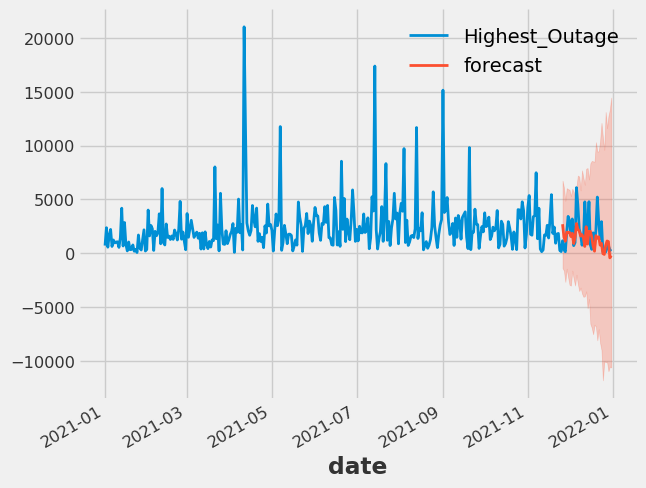

In [155]:
import matplotlib.pyplot as plt

series.plot()
prediction.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()

In [157]:
dfn=dfn.reset_index()

In [158]:
from darts.datasets import ETTh2Dataset

series = ETTh2Dataset().load()[:10000][["MUFL", "LULL"]]
train, val = series.split_before(0.6)

In [159]:
from darts.ad import KMeansScorer

scorer = KMeansScorer(k=2, window=5)
scorer.fit(train)
anom_score = scorer.score(val)

In [160]:
from darts.ad import QuantileDetector

detector = QuantileDetector(high_quantile=0.99)
detector.fit(scorer.score(train))
binary_anom = detector.detect(anom_score)

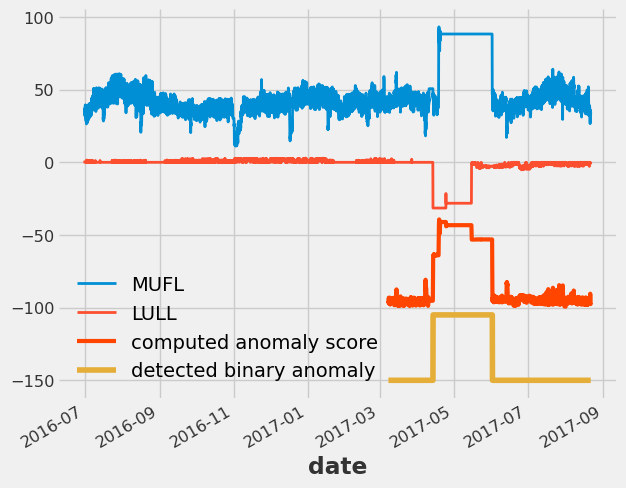

In [161]:
import matplotlib.pyplot as plt

series.plot()
(anom_score / 2. - 100).plot(label="computed anomaly score", c="orangered", lw=3)
(binary_anom * 45 - 150).plot(label="detected binary anomaly", lw=4)

In [162]:
Series2 = TimeSeries.from_dataframe(df1, 'date', 'Highest_Outage',fill_missing_dates=True)

In [163]:
train, val = Series2.split_before(pd.Timestamp('20210101'))

In [164]:
from darts.models import ExponentialSmoothing

model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val))

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


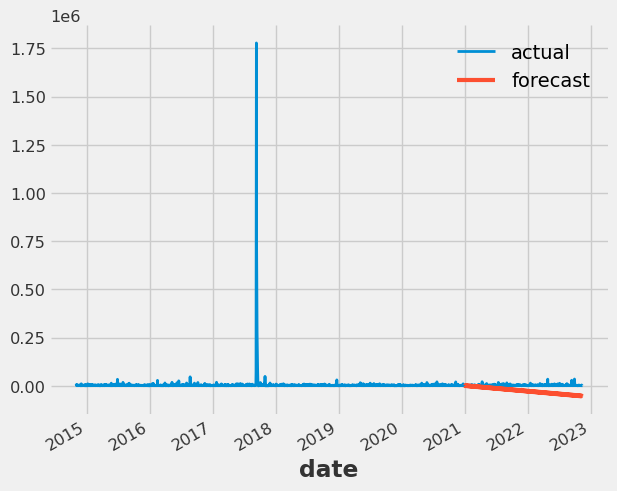

In [165]:
import matplotlib.pyplot as plt

Series2.plot(label = 'actual')
prediction.plot(label = 'forecast', lw = 3)
plt.legend()

In [166]:
from darts.models import AutoARIMA

model_aarima = AutoARIMA()
model_aarima.fit(train)
prediction_aarima = model_aarima.predict(len(val))

In [167]:
from darts.models import FFT

model_fft = FFT()
model_fft.fit(train)
prediction_fft = model_fft.predict(len(val))

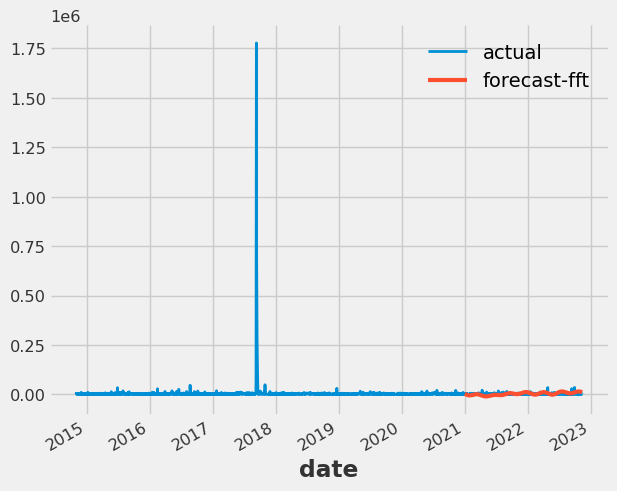

In [168]:
Series2.plot(label = 'actual')
prediction_fft.plot(label = 'forecast-fft', lw = 3)
plt.legend()

In [169]:
# facebook prophet model
from darts.models import Prophet

model_prophet = Prophet()
model_prophet.fit(train)
prediction_prophet = model_prophet.predict(len(val))

14:29:59 - cmdstanpy - INFO - Chain [1] start processing
14:29:59 - cmdstanpy - INFO - Chain [1] done processing


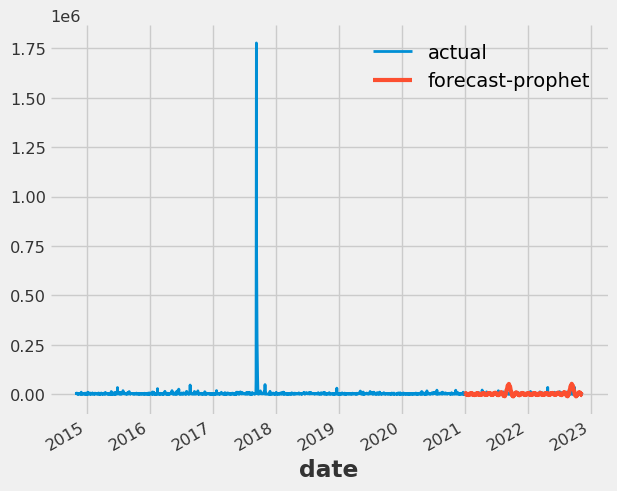

In [170]:
Series2.plot(label = 'actual')
prediction_prophet.plot(label = 'forecast-prophet', lw = 3)
plt.legend()

In [171]:
from darts.backtesting import backtest_forecasting

models = [ExponentialSmoothing(), Prophet()]

ModuleNotFoundError: No module named 'darts.backtesting'

NameError: name 'models' is not defined

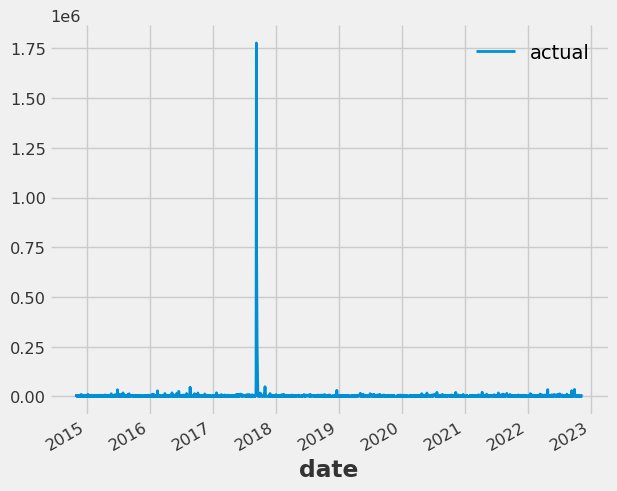

In [172]:
from darts.metrics import mape

Series2.plot(label='actual')
for i, m in enumerate(models):
    err = mape(backtests[i], Series2)
    backtests[i].plot(lw = 3, label = '{}, MAPE = {:.2f}%'.format(m, err))
    
plt.title('Backtest with 3-months forecast horizon')
plt.legend()

In [173]:
test_df = df1[df1['Highest_Outage'].isna()]
train_df = df1[~df1['Highest_Outage'].isna()]

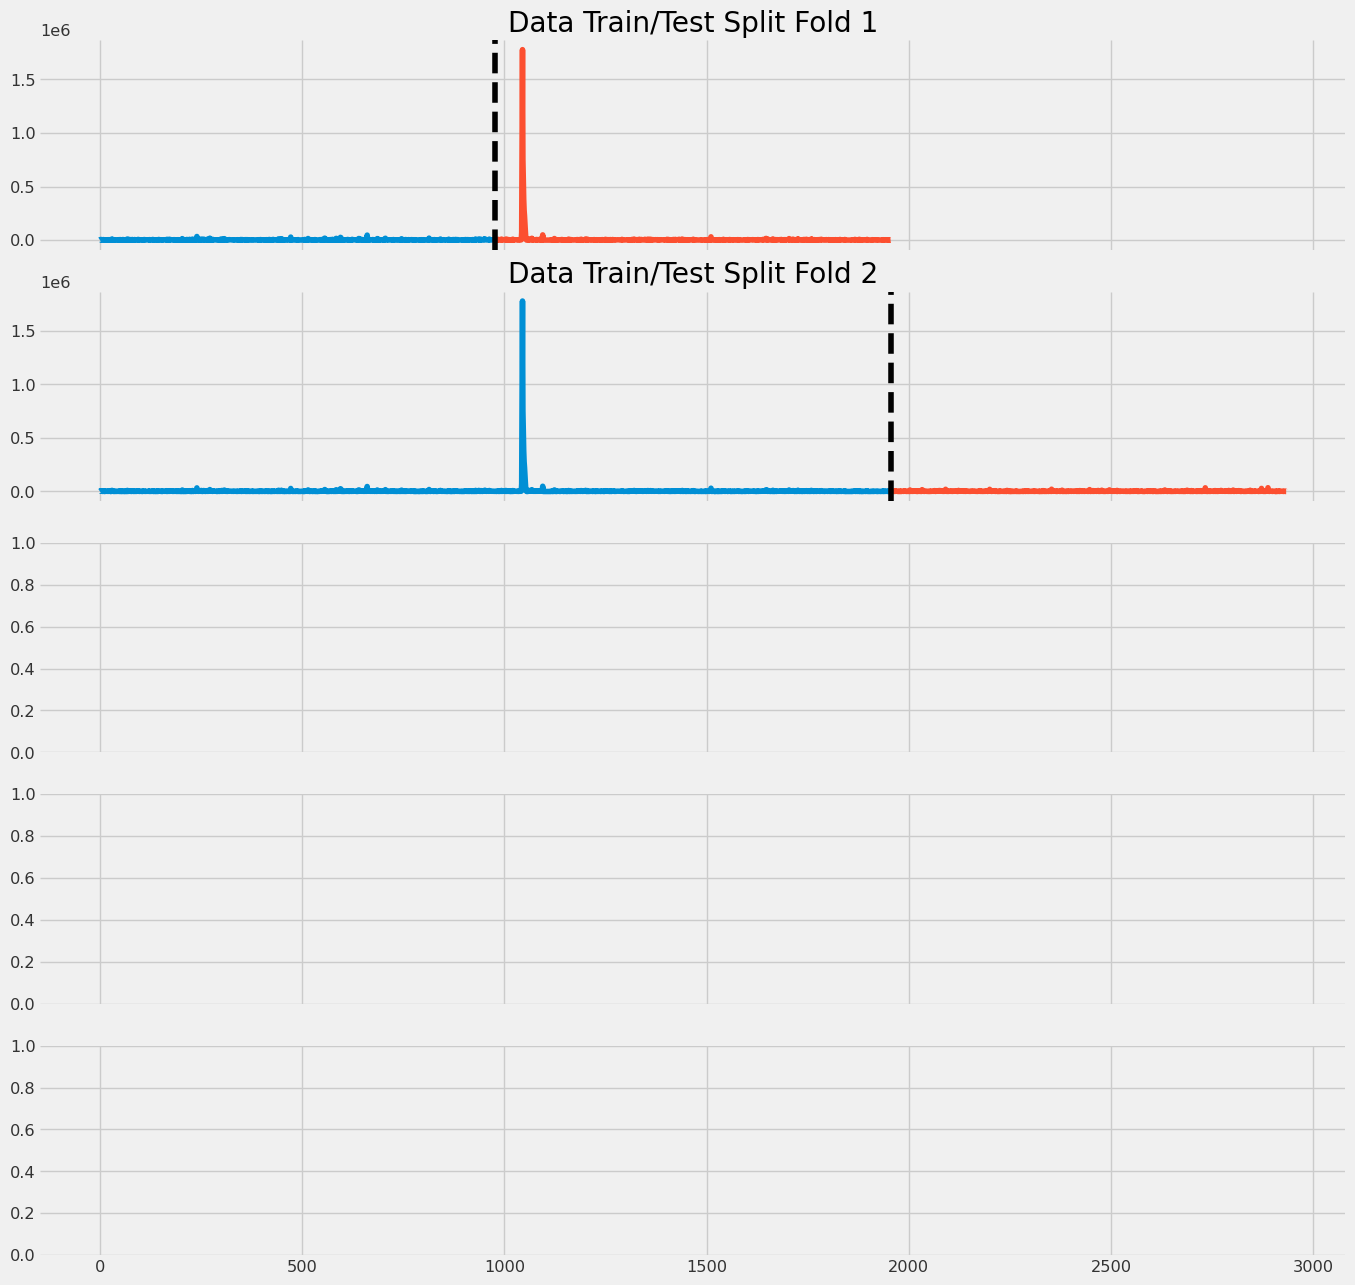

In [174]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import catboost as cat
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import  TimeSeriesSplit
from darts import TimeSeries
from darts.models import RegressionModel
tss = TimeSeriesSplit(n_splits=2)

fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(train_df):
    train_df.iloc[train_idx]['Highest_Outage'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold + 1}')
    train_df.iloc[val_idx]['Highest_Outage'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(train_df.iloc[val_idx].index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [175]:
catboost_models = []
fold = 0
scores = []

for train_idx, val_idx in tss.split(train_df):
    train_data = train_df.iloc[train_idx]
    test_data = train_df.iloc[val_idx]

    X_train, y_train = train_data.drop('Highest_Outage', axis=1), train_data['Highest_Outage']
    X_val, y_val = test_data.drop('Highest_Outage', axis=1), test_data['Highest_Outage']

    feature_cov_train = TimeSeries.Series2(X_train)
    y_train_ts = TimeSeries.Series2(y_train)
    feature_cov_test = TimeSeries.Series2(X_val)

    model_catboost = RegressionModel(lags=[-24, -128, -256, -512, -1024, -2048, -4096],
                                     lags_future_covariates=[0],
                                     model=cat.CatBoostRegressor(n_estimators=1000,
                                                                 verbose=200,
                                                                 eval_metric='MAPE'))

    print(f'{fold + 1}. Fold Training... ')
    fold += 1
    model_catboost.fit(y_train_ts, future_covariates=feature_cov_train)
    catboost_models.append(model_catboost)
    pred = model_catboost.predict(n=X_val.shape[0], Series2=y_train_ts, future_covariates=feature_cov_test)
    score = mean_absolute_percentage_error(y_val, pred.values())
    scores.append(score)
    del train_data, test_data, model_catboost, X_train, y_train, X_val, y_val

    print(f'Test score => {score}')

print(f'CV score => {np.average(scores)}')

AttributeError: type object 'TimeSeries' has no attribute 'Series2'

In [176]:
from catboost import CatBoostRegressor
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_percentage_error

# Assuming you have a DataFrame named 'train_df' with columns 'fips_code', 'date', and 'Highest_Outage'

tss = TimeSeriesSplit(n_splits=5)  # You can adjust the number of splits

catboost_models = []
fold = 0
scores = []

for train_idx, val_idx in tss.split(train_df):
    train_data = train_df.iloc[train_idx]
    test_data = train_df.iloc[val_idx]

    X_train, y_train = train_data.drop('Highest_Outage', axis=1), train_data['Highest_Outage']
    X_val, y_val = test_data.drop('Highest_Outage', axis=1), test_data['Highest_Outage']

    model_catboost = CatBoostRegressor(n_estimators=1000, verbose=200, eval_metric='MAPE')
    
    print(f'{fold + 1}. Fold Training... ')
    fold += 1
    model_catboost.fit(X_train, y_train)
    catboost_models.append(model_catboost)
    
    pred = model_catboost.predict(X_val)
    score = mean_absolute_percentage_error(y_val, pred)
    scores.append(score)
    
    print(f'Test score => {score}')

print(f'CV score => {np.average(scores)}')

1. Fold Training... 
Learning rate set to 0.036567
0:	learn: 1.8066736	total: 150ms	remaining: 2m 29s
200:	learn: 1.5164861	total: 364ms	remaining: 1.45s
400:	learn: 1.4278960	total: 584ms	remaining: 872ms
600:	learn: 1.3488748	total: 804ms	remaining: 534ms
800:	learn: 1.2804284	total: 1.03s	remaining: 256ms
999:	learn: 1.2255555	total: 1.25s	remaining: 0us
Test score => 1.3863401679323104
2. Fold Training... 
Learning rate set to 0.040799
0:	learn: 1.7934391	total: 1.35ms	remaining: 1.35s
200:	learn: 1.5622975	total: 243ms	remaining: 967ms
400:	learn: 1.4815556	total: 496ms	remaining: 741ms
600:	learn: 1.4225277	total: 749ms	remaining: 497ms
800:	learn: 1.3847743	total: 991ms	remaining: 246ms
999:	learn: 1.3545985	total: 1.25s	remaining: 0us
Test score => 3.366256409659658e+17
3. Fold Training... 
Learning rate set to 0.043499
0:	learn: 95.4494356	total: 1.43ms	remaining: 1.43s
200:	learn: 74.9608474	total: 268ms	remaining: 1.07s
400:	learn: 28.2921125	total: 550ms	remaining: 822ms
60

In [177]:
final_model = CatBoostRegressor(n_estimators=1000, verbose=200, eval_metric='MAPE')
final_model.fit(train_df.drop('Highest_Outage', axis=1), train_df['Highest_Outage'])

Learning rate set to 0.048533
0:	learn: 37.6744373	total: 1.62ms	remaining: 1.61s
200:	learn: 30.7463257	total: 325ms	remaining: 1.29s
400:	learn: 20.8232084	total: 654ms	remaining: 976ms
600:	learn: 15.0352210	total: 1.01s	remaining: 672ms
800:	learn: 13.2530980	total: 1.35s	remaining: 337ms
999:	learn: 12.2044027	total: 1.7s	remaining: 0us


In [178]:
# Assuming 'test_df' is your DataFrame containing the test data with the same features as 'train_df'
test_predictions = final_model.predict(test_df.drop('Highest_Outage', axis=1))

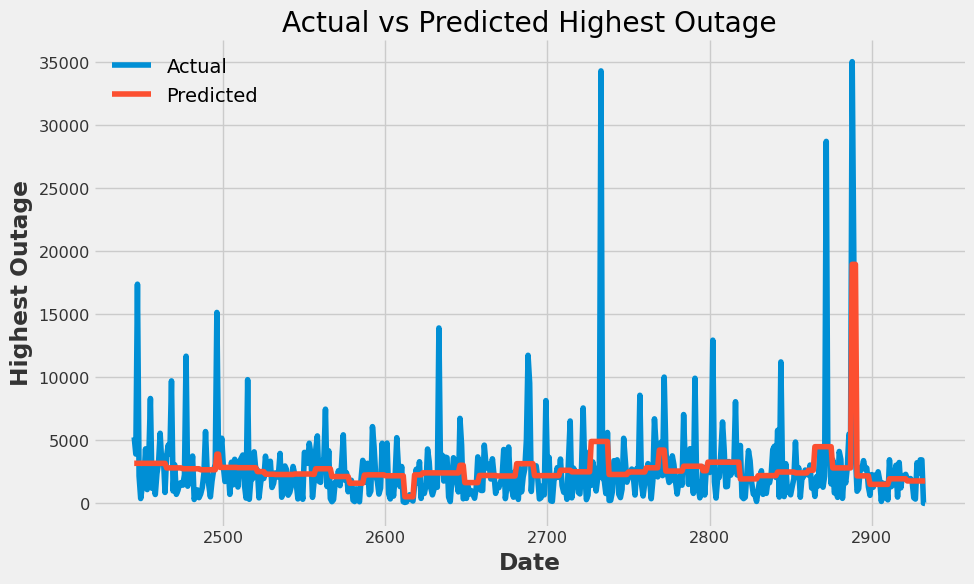

Test MAPE: 16470818129181400.00%
Test Accuracy: -16470818129181300.00%


In [179]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_percentage_error

# Assuming 'test_df' is your DataFrame containing the test data with the same features as 'train_df'
test_features = test_data.drop('Highest_Outage', axis=1)
test_actual_values = test_data['Highest_Outage']

# Make predictions using the final model
test_predictions = final_model.predict(test_features)

# Calculate MAPE
test_mape = mean_absolute_percentage_error(test_actual_values, test_predictions)

# Plot predicted vs actual values
plt.figure(figsize=(10, 6))
plt.plot(test_actual_values.index, test_actual_values.values, label='Actual')
plt.plot(test_actual_values.index, test_predictions, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Highest Outage')
plt.title('Actual vs Predicted Highest Outage')
plt.legend()
plt.show()

# Display test loss (MAPE) and accuracy
print(f'Test MAPE: {test_mape:.2f}%')
print(f'Test Accuracy: {100 - test_mape:.2f}%')

In [195]:
import pandas as pd
from darts import TimeSeries
from datetime import datetime  # Add this line to import the datetime class

# Your code and functions...

# In your eval_model function, explicitly use the datetime class to call the now() method
def eval_model(model):
    start_time = datetime.now()  # Use datetime.now() instead of just now()
    model.fit(train)
    time_elapsed = datetime.now() - start_time
    forecast = model.predict(len(val))
    print("model {} obtains MAPE: {:.2f}% , Training time: {}".format(model, mape(val, forecast), time_elapsed))

eval_model(ExponentialSmoothing())
eval_model(FFT())
eval_model(Prophet())

C:\Users\halee\anaconda\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
ValueError: The actual series must be strictly positive to compute the MAPE.


ValueError: The actual series must be strictly positive to compute the MAPE.

In [196]:
model_demand = Prophet()
model_demand.fit(train)

14:37:40 - cmdstanpy - INFO - Chain [1] start processing
14:37:40 - cmdstanpy - INFO - Chain [1] done processing


Prophet(add_seasonalities=None, country_holidays=None, suppress_stdout_stderror=True, add_encoders=None, cap=None, floor=None)

ValueError: The actual series must be strictly positive to compute the MAPE.


ValueError: The actual series must be strictly positive to compute the MAPE.

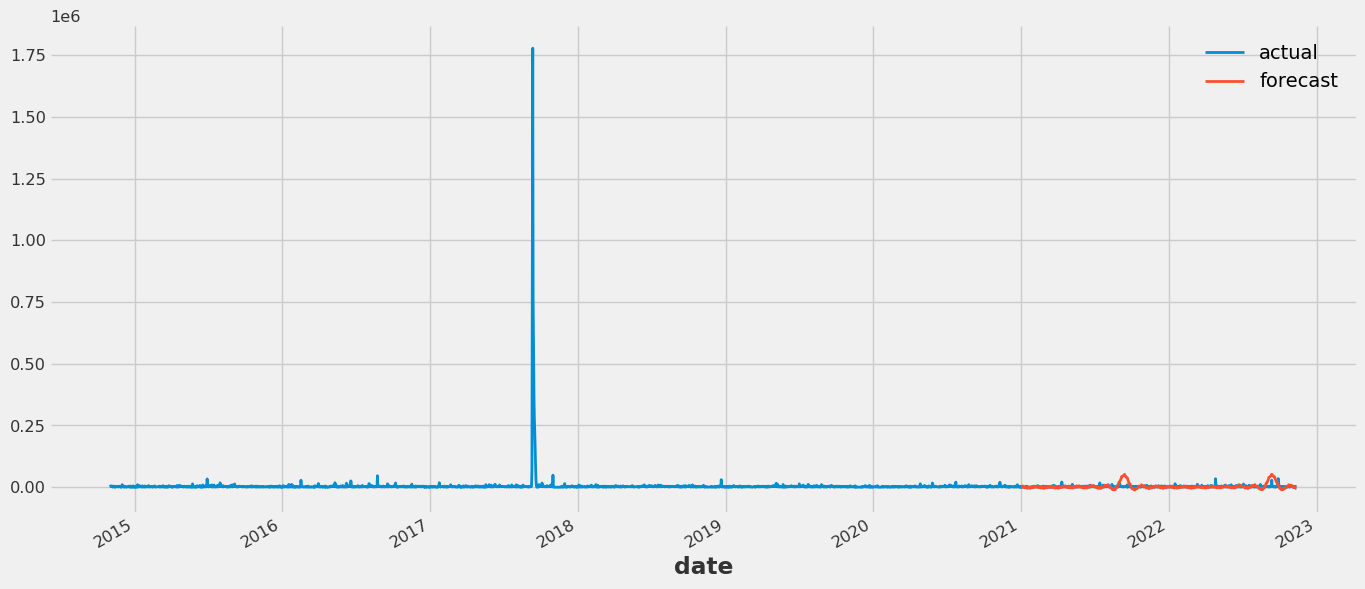

In [197]:
# use the model to make a forecast
pred_demand = model_demand.predict(len(val))

plt.figure(figsize=(15, 6))
series_demand.plot(label="actual")
pred_demand.plot(label="forecast")
plt.title("MAPE: {}".format(mape(val, pred_demand)))

In [200]:
def display_forecast(pred_series, ts_transformed, forecast_type, start_date=None):
    plt.figure(figsize=(15, 5))
    if start_date:
        ts_transformed = ts_transformed.drop_before(start_date)
    ts_transformed.univariate_component(0).plot(label="actual")
    pred_series.plot(label=("historic " + forecast_type + " forecasts"))
    plt.title(
        "R2: {}".format(r2_score(ts_transformed.univariate_component(0), pred_series))
    )
    plt.legend()

pred_series = model_demand.historical_forecasts(
    series_demand,
    start=pd.Timestamp("2020-09-01"),
    forecast_horizon=30,
    stride=5,
    verbose=True,
)
display_forecast(pred_series, series_demand, "30 day", start_date=pd.Timestamp("2020-09-01"))

  0%|          | 0/155 [00:00<?, ?it/s]

14:40:18 - cmdstanpy - INFO - Chain [1] start processing
14:40:18 - cmdstanpy - INFO - Chain [1] done processing
14:40:19 - cmdstanpy - INFO - Chain [1] start processing
14:40:19 - cmdstanpy - INFO - Chain [1] done processing
14:40:19 - cmdstanpy - INFO - Chain [1] start processing
14:40:19 - cmdstanpy - INFO - Chain [1] done processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] done processing
14:40:20 - cmdstanpy - INFO - Chain [1] start processing
14:40:20 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] start processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:21 - cmdstanpy - INFO - Chain [1] start processing
14:40:21 - cmdstanpy - INFO - Chain [1] done processing
14:40:22 - cmdstanpy - INFO - Chain [1] start processing
14:40:22 - cmdstanpy - INFO - Chain [1] done processing
14:40:22 - cmdstanpy - INFO - Chain [1] start processing
14:40:22 - cmdstanpy - INFO - Chain [1]

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\halee\\AppData\\Local\\Temp\\tmp6s9sdr2z\\z_9rukj6.json'

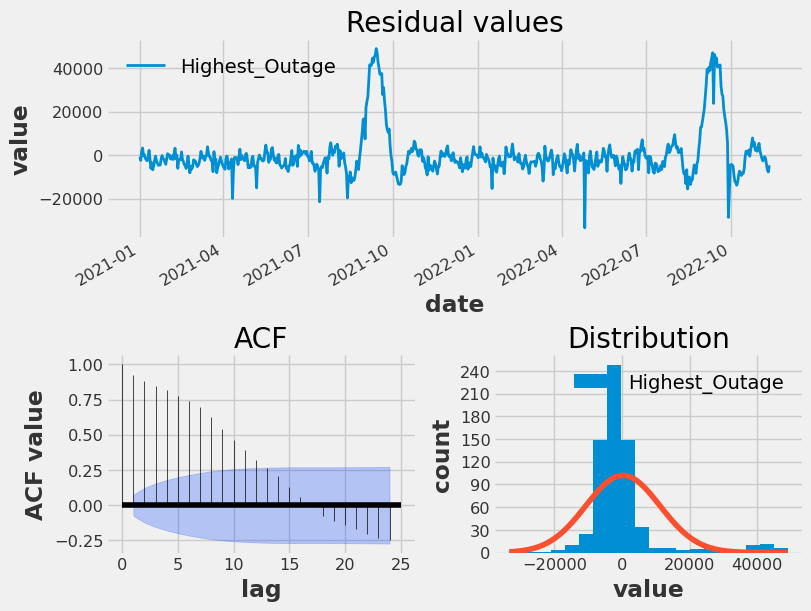

In [201]:
# investigate the residuals in the validation dataset
from darts.utils.statistics import plot_residuals_analysis
resid = pred_demand - val
plot_residuals_analysis(resid);

In [192]:
#Creating timeseries object for demand
from darts import TimeSeries
series_demand = TimeSeries.from_dataframe(df1, value_cols='Highest_Outage',fill_missing_dates=True)
series_demand

<TimeSeries (DataArray) (date: 2934, component: 1, sample: 1)>
array([[[1822.]],

       [[4260.]],

       [[2325.]],

       ...,

       [[3458.]],

       [[  20.]],

       [[   0.]]])
Coordinates:
  * date       (date) datetime64[ns] 2014-11-01 2014-11-02 ... 2022-11-12
  * component  (component) object 'Highest_Outage'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

In [189]:
df1

,index,date,Highest_Outage,month
time,,,,
0,0,2014-11-01,1822.0,11
1,1,2014-11-02,4260.0,11
2,2,2014-11-03,2325.0,11
3,3,2014-11-04,5615.0,11
4,4,2014-11-05,2723.0,11
...,...,...,...,...
2929,2929,2022-11-08,2423.0,11
2930,2930,2022-11-09,3465.0,11
2931,2931,2022-11-10,3458.0,11


In [190]:
# Convert run_start_time to datetime format
df1['date'] = pd.to_datetime(df1['date'])

# Set the run_start_time column as the DataFrame index
df1.set_index('date', inplace=True)

seasonal? False


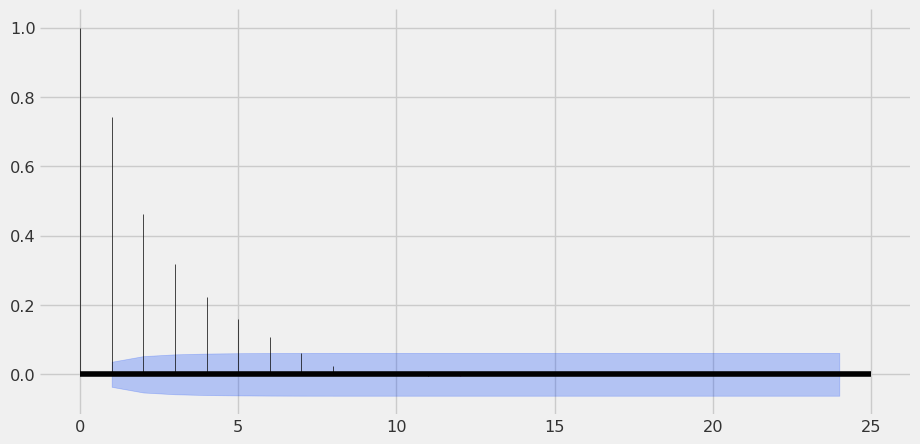

In [193]:
# Check for seasonality
from darts.utils.statistics import plot_acf, check_seasonality

for m in range(2, 25):
    is_seasonal, mseas = check_seasonality(series_demand, m=m, alpha=0.05)
    if is_seasonal:
        break

print("seasonal? " + str(is_seasonal))
if is_seasonal:
    print('There is seasonality of order {}.'.format(mseas))

plot_acf(series_demand, m=12, alpha=0.05)

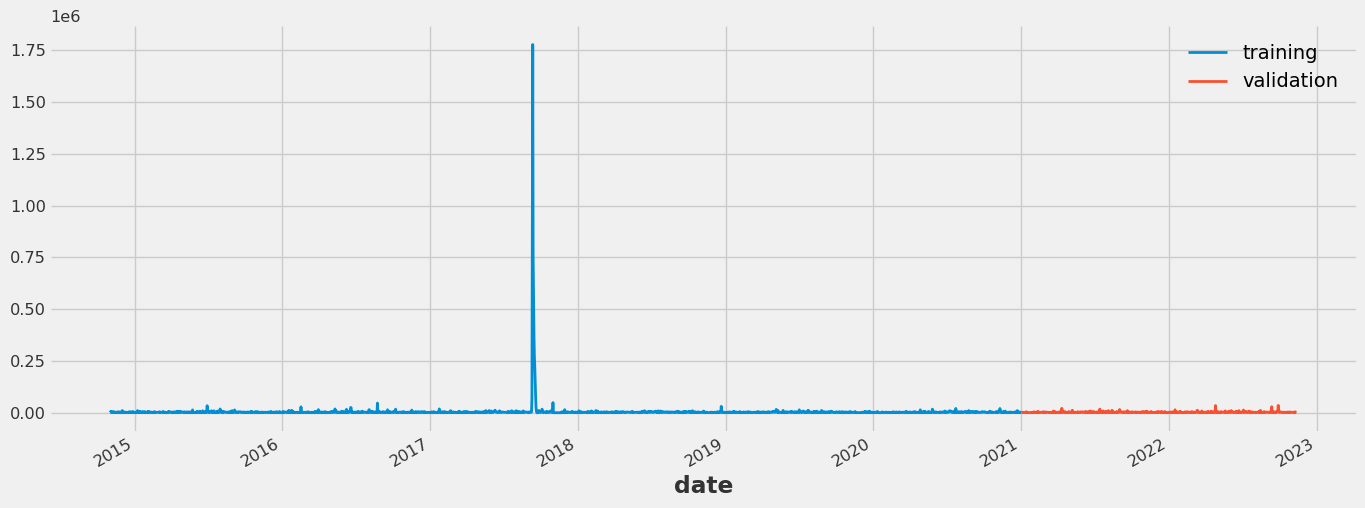

In [194]:
train, val = series_demand.split_before(pd.Timestamp("20210101"))
plt.figure(figsize=(15,5))
train.plot(label="training")
val.plot(label="validation")